# Multi-class Classification of sign-language

## Training Data used
Sign language MNIST dataset from kaggle

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
TRAIN_DIR = 'data/train/'
VALIDATION_DIR = 'data/validation/'

Sample images

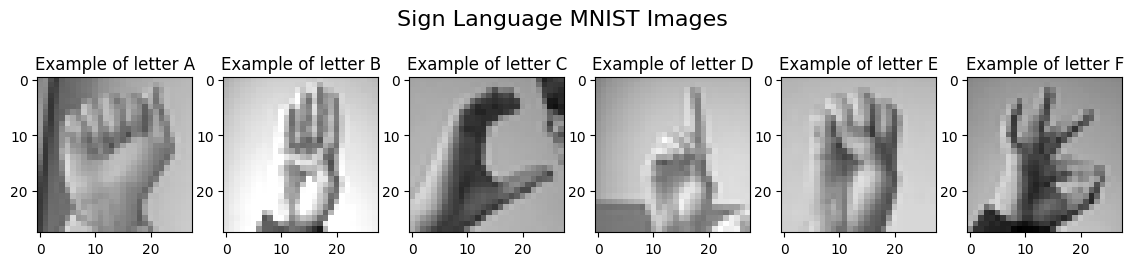

In [4]:
fig, axes = plt.subplots(1, 6, figsize=(14, 3))
fig.suptitle('Sign Language MNIST Images', fontsize=16)

# Plot one image from the first 4 letters
for ii, letter in enumerate(['A' , 'B', 'C', 'D', 'E', 'F']):
    dir = f'./data/train/{letter}'
    img = tf.keras.preprocessing.image.load_img(dir+'/'+os.listdir(dir)[0])
    axes[ii].imshow(img)
    axes[ii].set_title(f'Example of letter {letter}')

In [5]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (28, 28, 3)


In [7]:
def train_val_datasets():
    """Create train and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): train and validation datasets
    """
    train_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(28,28),
        color_mode = 'grayscale', # Use this argument to get just one color dimension, because it is greyscale,
        label_mode='int'
    ) 
    
    validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(28,28),
        color_mode = 'grayscale', # Use this argument to get just one color dimension, because it imgs are greyscale
        label_mode='int'
    ) 
    
    return train_dataset, validation_dataset

In [8]:
# Create train and validation datasets
train_dataset, validation_dataset = train_val_datasets()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")   

Found 27455 files belonging to 24 classes.
Found 7173 files belonging to 24 classes.
Images of train dataset have shape: (None, 28, 28, 1)
Labels of train dataset have shape: (None,)
Images of validation dataset have shape: (None, 28, 28, 1)
Labels of validation dataset have shape: (None,)


In [16]:
def create_model():
    """

    Returns:
        tf.keras.model.Sequential: CNN for multi-class classification
    """    
    
    # Define the model
    model = tf.keras.models.Sequential([ 
        # Define an input layer
        tf.keras.layers.InputLayer(shape=(28,28,1)), # Set correct input size
        # Rescale images
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (4,4), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')
        ]) 

    model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

In [ ]:
# Create your model
model = create_model()


Check that the input and output shape of your model are correct

In [18]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 28, 28, 1)
Output shape: (None, 26)


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,122 (859.85 KB)

 Trainable params: 220,122 (859.85 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train your model
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
855/858 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4212 - loss: 1.9402

I0000 00:00:1723782883.578620    1296 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_542', 16 bytes spill stores, 16 bytes spill loads



858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.4222 - loss: 1.9367 - val_accuracy: 0.8052 - val_loss: 0.5940
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8778 - loss: 0.3557 - val_accuracy: 0.9159 - val_loss: 0.2470
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9561 - loss: 0.1366 - val_accuracy: 0.9371 - val_loss: 0.1743
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9742 - loss: 0.0787 - val_accuracy: 0.9433 - val_loss: 0.1679
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9821 - loss: 0.0529 - val_accuracy: 0.9466 - val_loss: 0.1873
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9898 - loss: 0.0339 - val_accuracy: 0.9368 - val_loss: 0.2137
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9543 - val_loss: 0.1702
Epoch 8/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9926 - loss: 0.0216 - val_accuracy: 0.9543 - va

Now take a look at your training history:

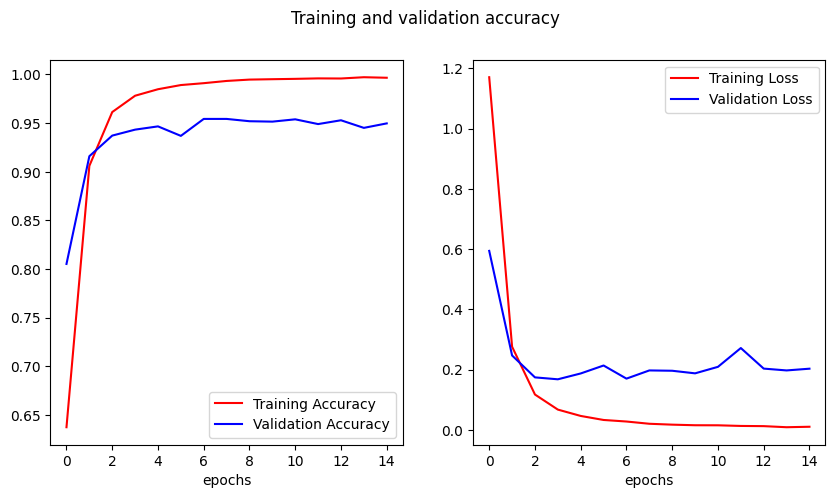

In [23]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()